In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# Define parameters
MTAC = 20
V1 = 800
epsilon = 1e-3

# Initial conditions
C1_0 = 10
C2_0 = 0
y0 = [C1_0, C2_0]

def V2(t):
    t_mod = t % 60  # For repeating every 60 minutes
    if t_mod < 10:
        return 30 * t_mod
    elif 10 <= t_mod < 40:
        return 300
    elif 40 <= t_mod < 60:
        return 300 - 15 * (t_mod - 40)

def dV2(t):
    t_mod = t % 60  # For repeating every 60 minutes
    if t_mod < 10:
        return 30
    elif 10 <= t_mod < 40:
        return 0
    elif 40 <= t_mod < 60:
        return -15
    
def V2_cont(t, max_vol):
    if t < 10:
        return max_vol * t / 10
    elif 10 <= t < 580:
        return max_vol
    elif 580 <= t < 600:
        return max_vol - max_vol * (t - 580) / 20


def equations(t, y):
    C1, C2 = y
    current_V2 = V2(t)
    if abs(t % 60) < 1e-3:  # Use a small tolerance to approximate multiples of 60
        C2 = 0
    dC1_dt = -MTAC / V1 * (C1 - C2)
    dC2_dt = MTAC / (current_V2 + epsilon) * (C1 - C2) - dV2(t) / (current_V2 + epsilon) * C2
    print(f"t={t:.2f}, C1={C1:.2f}, C2={C2:.2f}, V2={current_V2:.2f}, dC1_dt={dC1_dt:.2f}, dC2_dt={dC2_dt:.2f}")
    return [dC1_dt, dC2_dt]


t=0.00, C1=10.00, C2=0.00, V2=0.00, dC1_dt=-0.25, dC2_dt=200000.00
t=0.00, C1=10.00, C2=0.01, V2=0.00, dC1_dt=-0.25, dC2_dt=199273.72
t=0.00, C1=10.00, C2=0.00, V2=0.00, dC1_dt=-0.25, dC2_dt=200000.00
t=0.00, C1=10.00, C2=0.00, V2=0.00, dC1_dt=-0.25, dC2_dt=200000.00
t=0.00, C1=10.00, C2=0.00, V2=0.00, dC1_dt=-0.25, dC2_dt=195858.89
t=0.00, C1=10.00, C2=0.00, V2=0.00, dC1_dt=-0.25, dC2_dt=183832.39
t=0.00, C1=10.00, C2=0.00, V2=0.00, dC1_dt=-0.25, dC2_dt=176000.00
t=0.00, C1=10.00, C2=0.14, V2=0.00, dC1_dt=-0.25, dC2_dt=189150.02
t=0.00, C1=10.00, C2=0.52, V2=0.00, dC1_dt=-0.24, dC2_dt=159833.21
t=0.00, C1=10.00, C2=0.76, V2=0.00, dC1_dt=-0.23, dC2_dt=142539.08
t=0.00, C1=10.00, C2=0.77, V2=0.00, dC1_dt=-0.23, dC2_dt=142229.31
t=0.00, C1=10.00, C2=1.17, V2=0.00, dC1_dt=-0.22, dC2_dt=115190.58
t=0.00, C1=10.00, C2=2.22, V2=0.00, dC1_dt=-0.19, dC2_dt=58469.74
t=0.00, C1=10.00, C2=3.27, V2=0.00, dC1_dt=-0.17, dC2_dt=21082.65
t=0.00, C1=10.00, C2=1.16, V2=0.00, dC1_dt=-0.22, dC2_dt=115402.

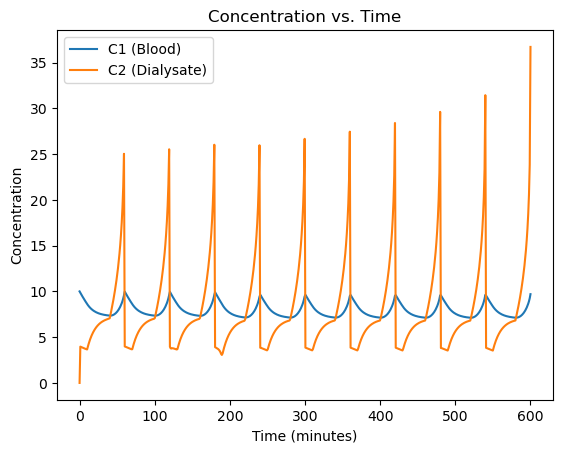

In [90]:
t_span = (0, 600)  # solve over a range of 120 minutes to see multiple cycles
t_eval = np.linspace(0, 600, 600)

# Solve the differential equations
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='Radau', max_step=0.1, rtol=0.1, atol=0.1)

# Plot the results
plt.plot(sol.t, sol.y[0], label="C1 (Blood)")
plt.plot(sol.t, sol.y[1], label="C2 (Dialysate)")
plt.xlabel("Time (minutes)")
plt.ylabel("Concentration")
plt.legend()
plt.title("Concentration vs. Time")
plt.show()

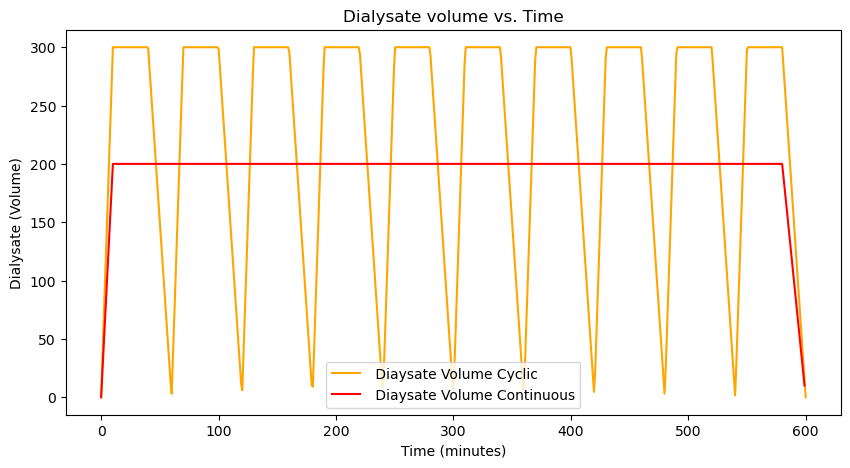

In [85]:
V2_values = [V2(t) for t in t_eval]
V2_cont_values = [V2_cont(t, 200) for t in t_eval]

# Plot V2 over time
plt.figure(figsize=(10, 5))
plt.plot(t_eval, V2_values, label=" Diaysate Volume Cyclic", color='orange')
plt.plot(t_eval, V2_cont_values, label=" Diaysate Volume Continuous", color='red')
plt.xlabel("Time (minutes)")
plt.ylabel("Dialysate (Volume)")
plt.legend()
plt.title("Dialysate volume vs. Time")
plt.show()